In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.
/Users/andrewwong/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
num_classes = 10
img_size = 28 # mnist size = 28*28

In [5]:
def load_data():
	# load mnist data
	(x_train, y_train), (x_test, y_test) = mnist.load_data()

	# preprocess data, let pixel between 0~1
	x_train = x_train.reshape((x_train.shape[0], img_size * img_size))
	x_train = x_train.astype('float32') / 255.

	x_test = x_test.reshape((x_test.shape[0], img_size * img_size))
	x_test = x_test.astype('float32') / 255.

	y_train = np_utils.to_categorical(y_train, num_classes)
	y_test = np_utils.to_categorical(y_test, num_classes)

	return x_train, y_train, x_test, y_test

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_18 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_19 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                310       
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 27,020
Trainable params: 27,020
Non-trainable params: 0
_________________________________________________________________
Train 

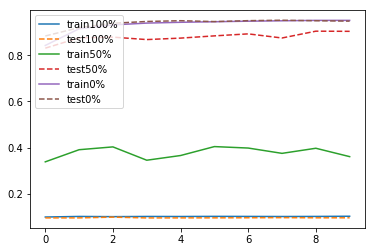

In [9]:
if __name__ == '__main__':
    historys=[]
    for j in range(3):
        x_train, y_train, x_test, y_test = load_data()
        for i in range(len(y_train)-30000*j):
            y_train[i] = np.eye(10)[np.random.choice(10,1)][0]
        # for i in range(len(y_test)):
        # 	y_test[i] = np.eye(10)[np.random.choice(10,1)][0]
        model = Sequential()
        model.add(Dense(32, input_dim = 784))
        model.add(Dense(10,activation='relu'))
        model.add(Dense(30,activation='relu'))
        model.add(Dense(30,activation='relu'))

        model.add(Dense(10))
        model.add(Activation('softmax'))
        model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
        model.summary()
        history = model.fit(x_train, y_train, epochs = 10, validation_split = 0.1, shuffle = False)
        historys.append(history)
        plt.plot(historys[j].history['acc'])
        plt.plot(historys[j].history['val_acc'],"--")
        plt.legend(['train100%', 'test100%','train50%','test50%','train0%','test0%'], loc='upper left')

60000/60000 [==============================] - 64s 1ms/step

Train Acc: 0.10075
10000/10000 [==============================] - 10s 991us/step

Test Acc: 0.0958


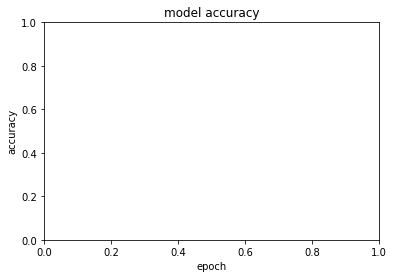

In [24]:

    # output score
score = model.evaluate(x_train,y_train)
print('\nTrain Acc:', score[1])
score = model.evaluate(x_test,y_test)
print('\nTest Acc:', score[1])



# plt.plot(historys[i].history['acc'])
# plt.plot(historys[i].history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()